## 코랩기준 좌측에 목차를 작성해놓았습니다. 
##목차를 참고하시면서 보시면 조금더 수월하게 보실 수 있으실 것 같습니다.

#[프로젝트 주제]
#Chest X-ray와 딥러닝을 이용한 정상, COVID-19, 폐렴 진단(분류)모델 개발 및  
#GAN을 활용한 가상 COVID-19 X-ray 이미지 생성


#1. 구글 드라이브 연동 및 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
!mkdir files
!unzip /gdrive/MyDrive/코드스테이츠/개인프로젝트/section6/classified_data_v1.zip -d /content/files

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: /content/files/Normal/Normal-8608.png  
 extracting: /content/files/Normal/Normal-8609.png  
 extracting: /content/files/Normal/Normal-861.png  
 extracting: /content/files/Normal/Normal-8610.png  
 extracting: /content/files/Normal/Normal-8611.png  
 extracting: /content/files/Normal/Normal-8612.png  
 extracting: /content/files/Normal/Normal-8613.png  
 extracting: /content/files/Normal/Normal-8614.png  
 extracting: /content/files/Normal/Normal-8615.png  
 extracting: /content/files/Normal/Normal-8616.png  
 extracting: /content/files/Normal/Normal-8617.png  
 extracting: /content/files/Normal/Normal-8618.png  
 extracting: /content/files/Normal/Normal-8619.png  
 extracting: /content/files/Normal/Normal-862.png  
 extracting: /content/files/Normal/Normal-8620.png  
 extracting: /content/files/Normal/Normal-8621.png  
 extracting: /content/files/Normal/Normal-8622.png  
 extracting: /content/files/Normal/Normal-8623.png  
 extracting:

#2. 라이브러리 설치 및 호출

In [ ]:
## keras-tuner 설치

!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 5.2MB/s 


In [ ]:
##import librarires

import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
## 시드고정

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(7)

#3. 이미지 데이터 전처리 및 시각화

In [ ]:
## train,test데이터를 8:2로 나누고 이미지 사이즈를 244*244로 변환

train_data = defect_tree = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/files',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/files',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 23991 files belonging to 4 classes.
Using 19193 files for training.
Found 23991 files belonging to 4 classes.
Using 4798 files for validation.


In [ ]:
##이미지 데이터의 라벨 확인

class_names =  ["Bacterial_Pneumonia","COVID_19","Normal", "Viral_Pneumonia"]
for i in range(len(class_names)):
    print(class_names[i] ," " , i)

Bacterial_Pneumonia   0
COVID_19   1
Normal   2
Viral_Pneumonia   3


              NORMAL


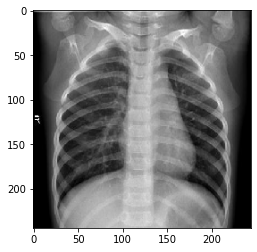

In [ ]:
##이미지 데이터 시각화 : NORMAL

image_path = "/content/files/Normal/568.jpeg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("              NORMAL")
plt.imshow(new_img);

       Bacterial Pneumonia


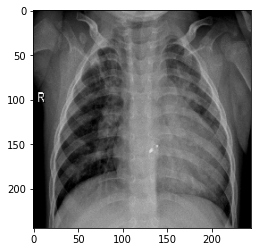

In [ ]:
#이미지 데이터 시각화 : : Bacterial_Pneumonia

image_path = "/content/files/Bacterial_Pneumonia/person1002_bacteria_2933.jpeg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("       Bacterial Pneumonia")
plt.imshow(new_img);

          Viral Pneumonia


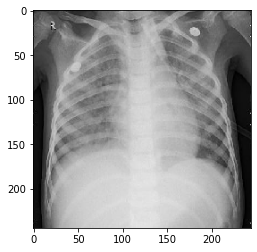

In [ ]:
##이미지 데이터 시각화 : Viral Pneumonia

image_path = "/content/files/Viral_Pneumonia/89.jpeg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("          Viral Pneumonia")
plt.imshow(new_img);

             COVID-19


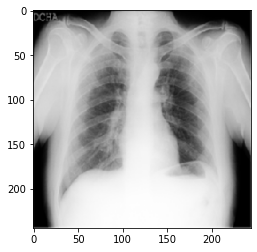

In [ ]:
#visualize data : COVID-19

image_path = "/content/files/COVID_19/COVID-1050.png"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("             COVID-19")
plt.imshow(new_img);

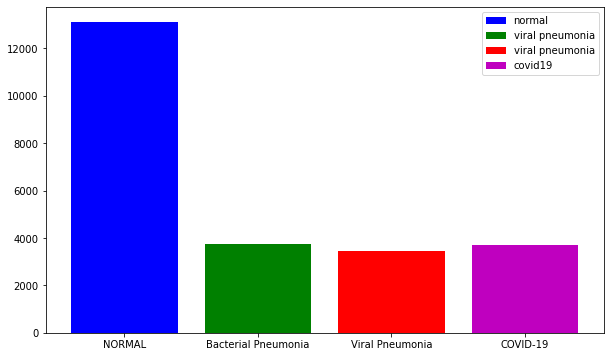

In [ ]:
## 카테고리별 이미지 데이터 수 시각화

fig, ax = plt.subplots(figsize=(10,6))
ax.bar("NORMAL",13105,color="b",label="normal")
ax.bar("Bacterial Pneumonia",3746,color="g",label="viral pneumonia")
ax.bar("Viral Pneumonia",3455,color="r",label="viral pneumonia")
ax.bar("COVID-19",3685,color="m",label="covid19")
ax.legend();

#4. CNN 모델 학습
- 총 2개의 모델을 학습시켰습니다.
- 두 모델의 차이는 CNN레이어 구조에 있습니다.
- 성능이 좋은 분류모델은 [모델2]이며 정확도는 95.9%입니다.

##4-1. 모델1

In [ ]:
## CNN 정의

model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(4, activation= 'softmax')
])

In [ ]:
##모델 컴파일

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## learning_rate_reduction 정의

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
## fit model

history=model.fit(train_data,validation_data= test_data,batch_size=32,epochs = 20,callbacks=[learning_rate_reduction])

Epoch 1/20
600/600 [==============================] - 74s 121ms/step - loss: 0.6583 - accuracy: 0.7542 - val_loss: 0.3751 - val_accuracy: 0.8399
Epoch 2/20
600/600 [==============================] - 73s 121ms/step - loss: 0.3641 - accuracy: 0.8489 - val_loss: 0.3082 - val_accuracy: 0.8720
Epoch 3/20
600/600 [==============================] - 73s 121ms/step - loss: 0.2799 - accuracy: 0.8855 - val_loss: 0.2586 - val_accuracy: 0.8900
Epoch 4/20
600/600 [==============================] - 73s 121ms/step - loss: 0.2192 - accuracy: 0.9108 - val_loss: 0.2401 - val_accuracy: 0.9045
Epoch 5/20
600/600 [==============================] - 73s 121ms/step - loss: 0.1639 - accuracy: 0.9362 - val_loss: 0.2198 - val_accuracy: 0.9183
Epoch 6/20
600/600 [==============================] - 73s 121ms/step - loss: 0.1253 - accuracy: 0.9522 - val_loss: 0.2294 - val_accuracy: 0.9212
Epoch 7/20
600/600 [==============================] - 73s 121ms/step - loss: 0.0937 - accuracy: 0.9644 - val_loss: 0.2271 - val_ac

In [ ]:
## 학습된 모델의 Loss와 Accuracy 출력

print("Loss of the model is - " , model.evaluate(test_data))

150/150 [==============================] - 11s 73ms/step - loss: 0.2936 - accuracy: 0.9548
Loss of the model is -  [0.29359641671180725, 0.9547728300094604]


##4-1. 모델2

In [ ]:
## CNN 정의

model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(4, activation= 'softmax')
])

In [ ]:
##모델 컴파일

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
## learning_rate_reduction 정의

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
## fit model

history=model.fit(train_data,validation_data= test_data,batch_size=32,epochs = 20,callbacks=[learning_rate_reduction])

Epoch 1/20
600/600 [==============================] - 74s 121ms/step - loss: 0.6875 - accuracy: 0.7301 - val_loss: 0.4690 - val_accuracy: 0.7918
Epoch 2/20
600/600 [==============================] - 73s 121ms/step - loss: 0.4417 - accuracy: 0.8117 - val_loss: 0.3662 - val_accuracy: 0.8404
Epoch 3/20
600/600 [==============================] - 73s 121ms/step - loss: 0.3468 - accuracy: 0.8580 - val_loss: 0.2949 - val_accuracy: 0.8745
Epoch 4/20
600/600 [==============================] - 73s 121ms/step - loss: 0.2837 - accuracy: 0.8856 - val_loss: 0.2674 - val_accuracy: 0.8895
Epoch 5/20
600/600 [==============================] - 74s 123ms/step - loss: 0.2336 - accuracy: 0.9063 - val_loss: 0.2530 - val_accuracy: 0.8987
Epoch 6/20
600/600 [==============================] - 74s 122ms/step - loss: 0.1891 - accuracy: 0.9253 - val_loss: 0.2294 - val_accuracy: 0.9091
Epoch 7/20
600/600 [==============================] - 75s 125ms/step - loss: 0.1629 - accuracy: 0.9389 - val_loss: 0.2498 - val_ac

In [ ]:
## 학습된 모델의 Loss와 Accuracy 출력

print("Loss of the model is - " , model.evaluate(test_data))
print("Accuracy of the model is - " , model.evaluate(test_data)*100 , "%")

150/150 [==============================] - 12s 75ms/step - loss: 0.2292 - accuracy: 0.9591
Loss of the model is -  [0.22921013832092285, 0.9591496586799622]
150/150 [==============================] - 12s 75ms/step - loss: 0.2292 - accuracy: 0.9591
Accuracy of the model is -  [0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2292102426290512, 0.9591496586799622, 0.2

In [ ]:
## 모델 저장하기
from keras.models import load_model
model.save('Xray_classification_model_first.h5')

In [ ]:
##모델 불러오기

from keras.models import load_model
loaded_model = load_model('/gdrive/MyDrive/코드스테이츠/개인프로젝트/section6/Xray_classification_model_first.h5')

##모델 사용하기

# new_predictions = loaded_model.predict_classes(test_data)
# new_predictions = new_predictions.reshape(1,-1)[0]
# new_predictions

In [ ]:

## 이미지를 모으기 위한 함수 정의

#label : 'Normal' = 0, Pneumonia = 1, COVID_19 = 2 

BACTERIALPNEUMONIA = 0
COVID_19 = 1
NORMAL = 2
VIRALPNEUMONIA = 3
img_size = 244  #이미지 사이즈 고정

def get_data(data_dir, label):
    data = [] 
    path = data_dir    
    for img in os.listdir(path):
        try:
            img_arr = cv2.imread(os.path.join(path, img)) # 로컬경로의 이미지 파일 읽는법, GRAYSCALE : 이미지를 흑백으로 읽어들임
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append([resized_arr, label])
        except Exception as e:
            print(e)
    return data

In [ ]:
##Bacterial_Pneumonia
Bacterial_Pneumonia = get_data("/content/files/Bacterial_Pneumonia", BACTERIALPNEUMONIA)

##COVID_19
COVID_19 = get_data("/content/files/COVID_19", COVID_19)

##Normal
Normal = get_data("/content/files/Normal", NORMAL)

##Viral_Pneumonia
Viral_Pneumonia = get_data("/content/files/Viral_Pneumonia", VIRALPNEUMONIA)

In [ ]:
## Bacterial_Pneumonia 이미지 데이터셋 분할 : 'train : val = 8 : 2'로 분할했습니다.
train_1, test_1 = train_test_split(Bacterial_Pneumonia, test_size=0.20, random_state=123)

## COVID19 이미지 데이터셋 분할 : 'train : val = 8 : 2'로 분할했습니다.
train_2, test_2 = train_test_split(COVID_19, test_size=0.20, random_state=123)

## Normal 이미지 데이터셋 분할 : 'train : val = 8 : 2'로 분할했습니다.
train_3, test_3 = train_test_split(Normal, test_size=0.20, random_state=123)

## Viral_Pneumonia 이미지 데이터셋 분할 : 'train : val = 8 : 2'로 분할했습니다.
train_4, test_4 = train_test_split(Viral_Pneumonia, test_size=0.20, random_state=123)

In [ ]:
## 분리되어있는 train, testset을 각각 합칩니다.

train_list = [train_1, train_2, train_3, train_4] 
train = []
for i in train_list :
  for j in i :
    train.append(j)

test_list = [test_1, test_2, test_3, test_4]
test = []
for i in test_list :
  for j in i :
    test.append(j)


## numpy array로 변환

train = np.array(train)
test = np.array(test)


## train, test set에서 lable 분리

x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:           #train이라는 리스트 안에 있는 2가지 요소(이미지넘파이어레이, 라벨번호)를 분리
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
## Normalize the data

x_train = np.array(x_train) 
x_test = np.array(x_test)

## resize data for deep learning (img_size = 244)

x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
x_test.shape

(4799, 244, 244, 3)

In [ ]:
##모델 사용하기

predictions = loaded_model.predict_classes(x_test)
predictions

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
y_test

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
#### 카테고리별 precision    recall  f1-score와 accuracy 출력


print(classification_report(y_test, predictions, target_names = ['Bacterial_Pneumonia (Class 0)','COVID_19 (Class 1)', 'Normal (Class 2)', 'Viral_Pneumonia (Class 3)']))

                               precision    recall  f1-score   support

Bacterial_Pneumonia (Class 0)       0.99      0.99      0.99       750
           COVID_19 (Class 1)       0.99      0.99      0.99       737
             Normal (Class 2)       1.00      1.00      1.00      2621
    Viral_Pneumonia (Class 3)       0.98      0.99      0.99       691

                     accuracy                           0.99      4799
                    macro avg       0.99      0.99      0.99      4799
                 weighted avg       0.99      0.99      0.99      4799



In [ ]:
## confusion_matrix 생성 시작
import pandas as pd
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm , index = ['Bacterial_Pneumonia (Class 0)','COVID_19 (Class 1)', 'Normal (Class 2)', 'Viral_Pneumonia (Class 3)'] , columns = ['Bacterial_Pneumonia (Class 0)','COVID_19 (Class 1)', 'Normal (Class 2)', 'Viral_Pneumonia (Class 3)'])

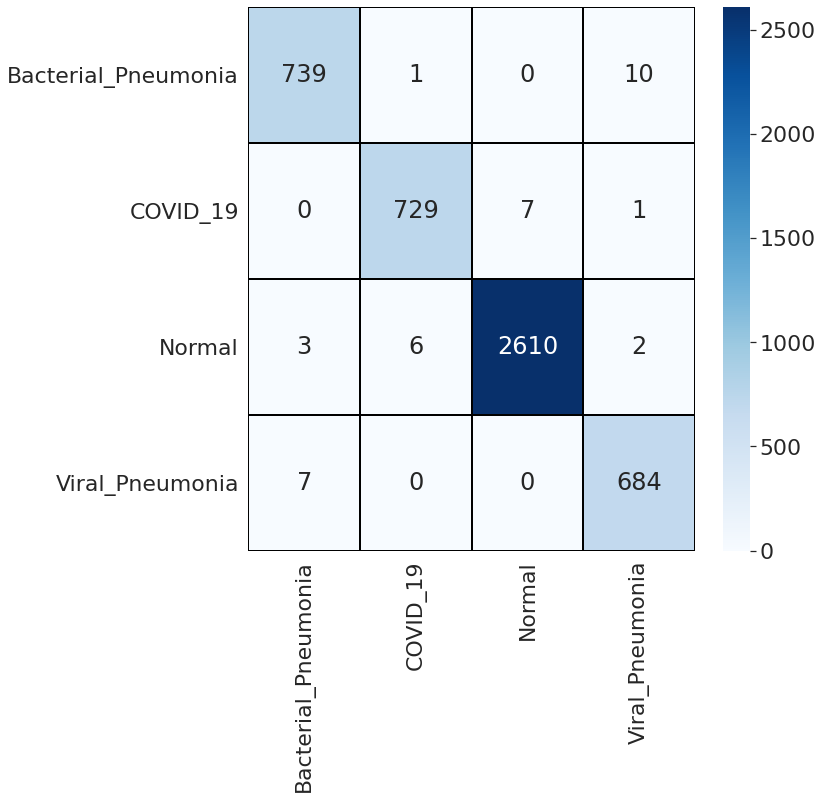

In [ ]:
labels = ['Bacterial_Pneumonia','COVID_19', 'Normal', 'Viral_Pneumonia']
plt.figure(figsize = (10,10))
sns.set(font_scale=2)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)